In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dfHouse = pd.read_csv("./USA_Housing.csv")
dfHouse.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
dfHouse.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [4]:
dfHouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
dfHouse.drop_duplicates(inplace=True)
dfHouse.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

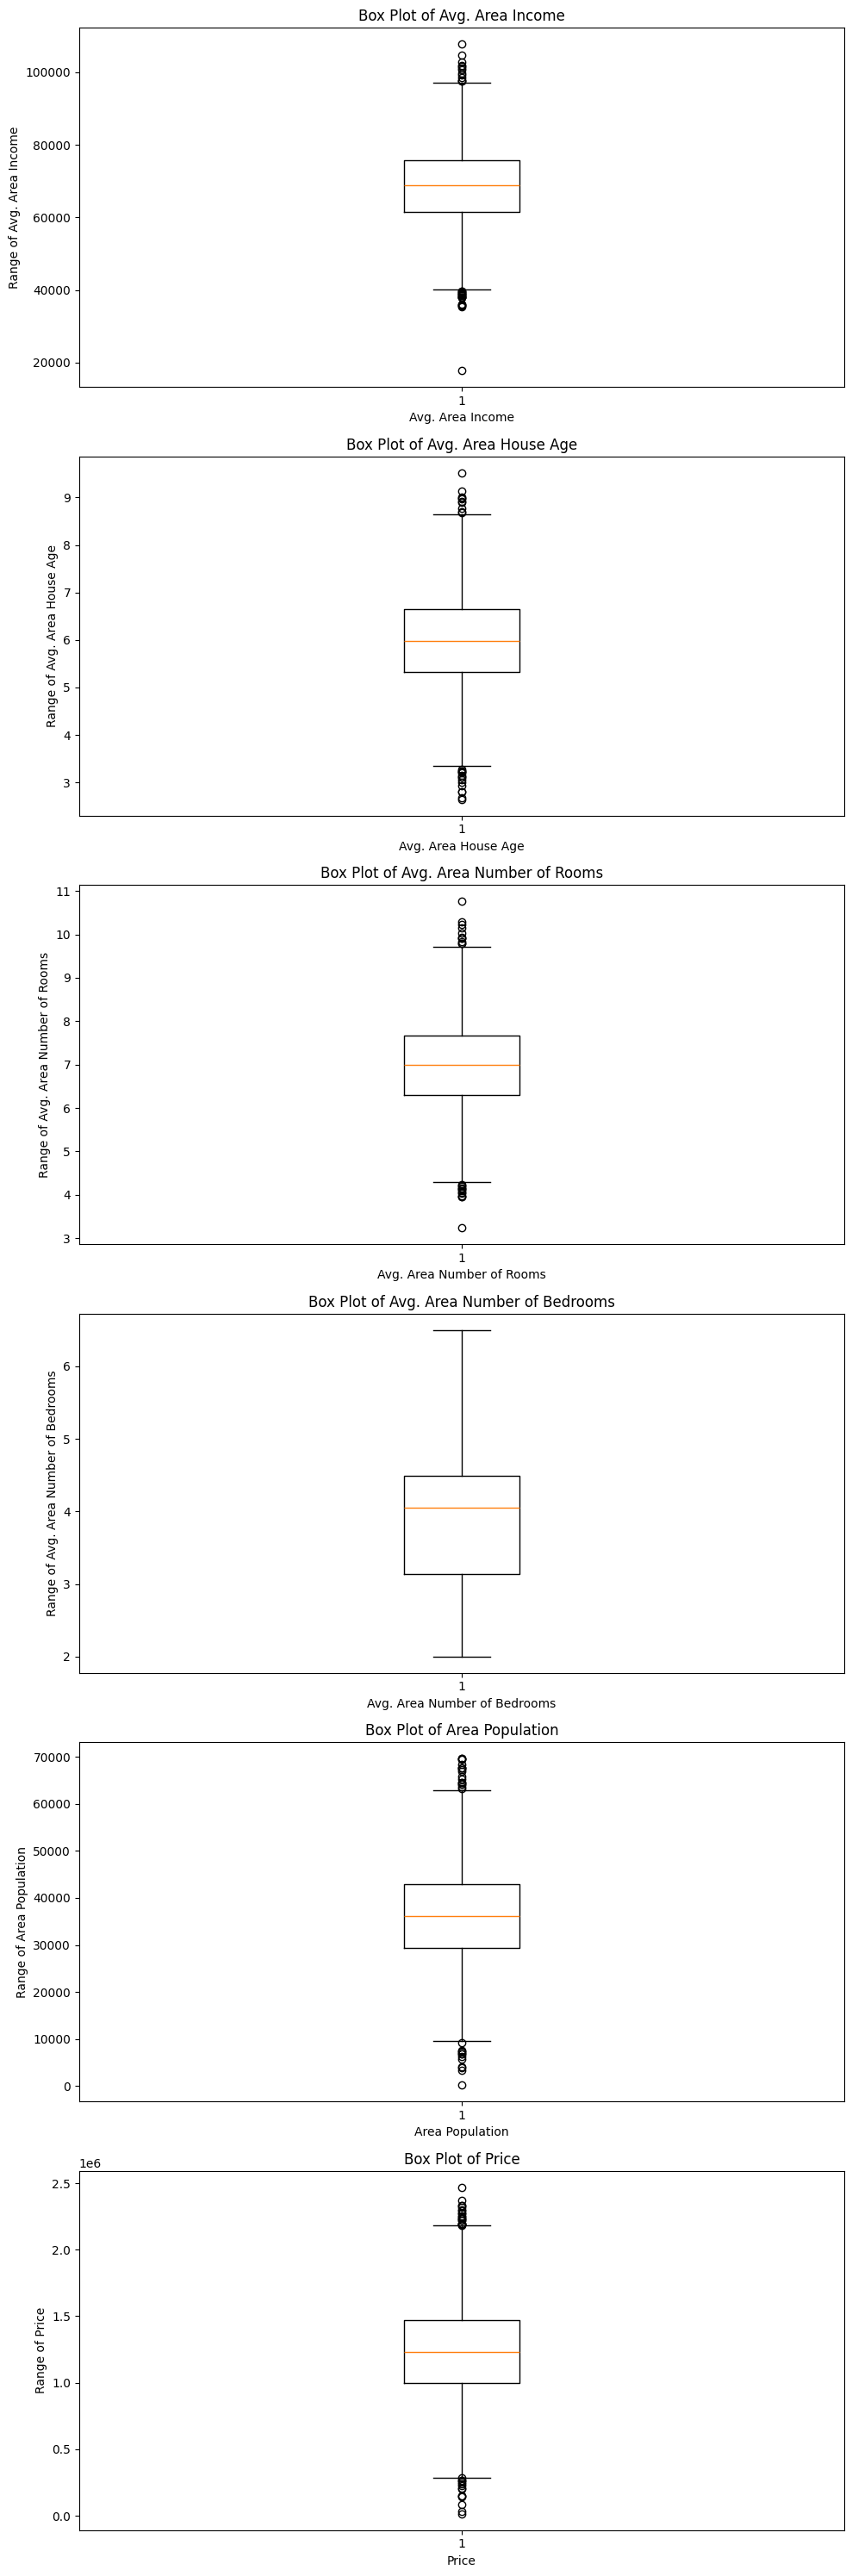

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def PrintChart(dfHouse):
    float_cols = dfHouse.select_dtypes(include=['float64']).columns
    fig, axes = plt.subplots(len(float_cols), 1, figsize=(10, 5 * (len(float_cols))))
    
    # Box plots for each float64 column
    for idx, col in enumerate(float_cols):
        axes[idx].boxplot(dfHouse[col])
        axes[idx].set_title(f"Box Plot of {col}")
        axes[idx].set_ylabel(f"Range of {col}")
        axes[idx].set_xlabel(col)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
PrintChart(dfHouse)

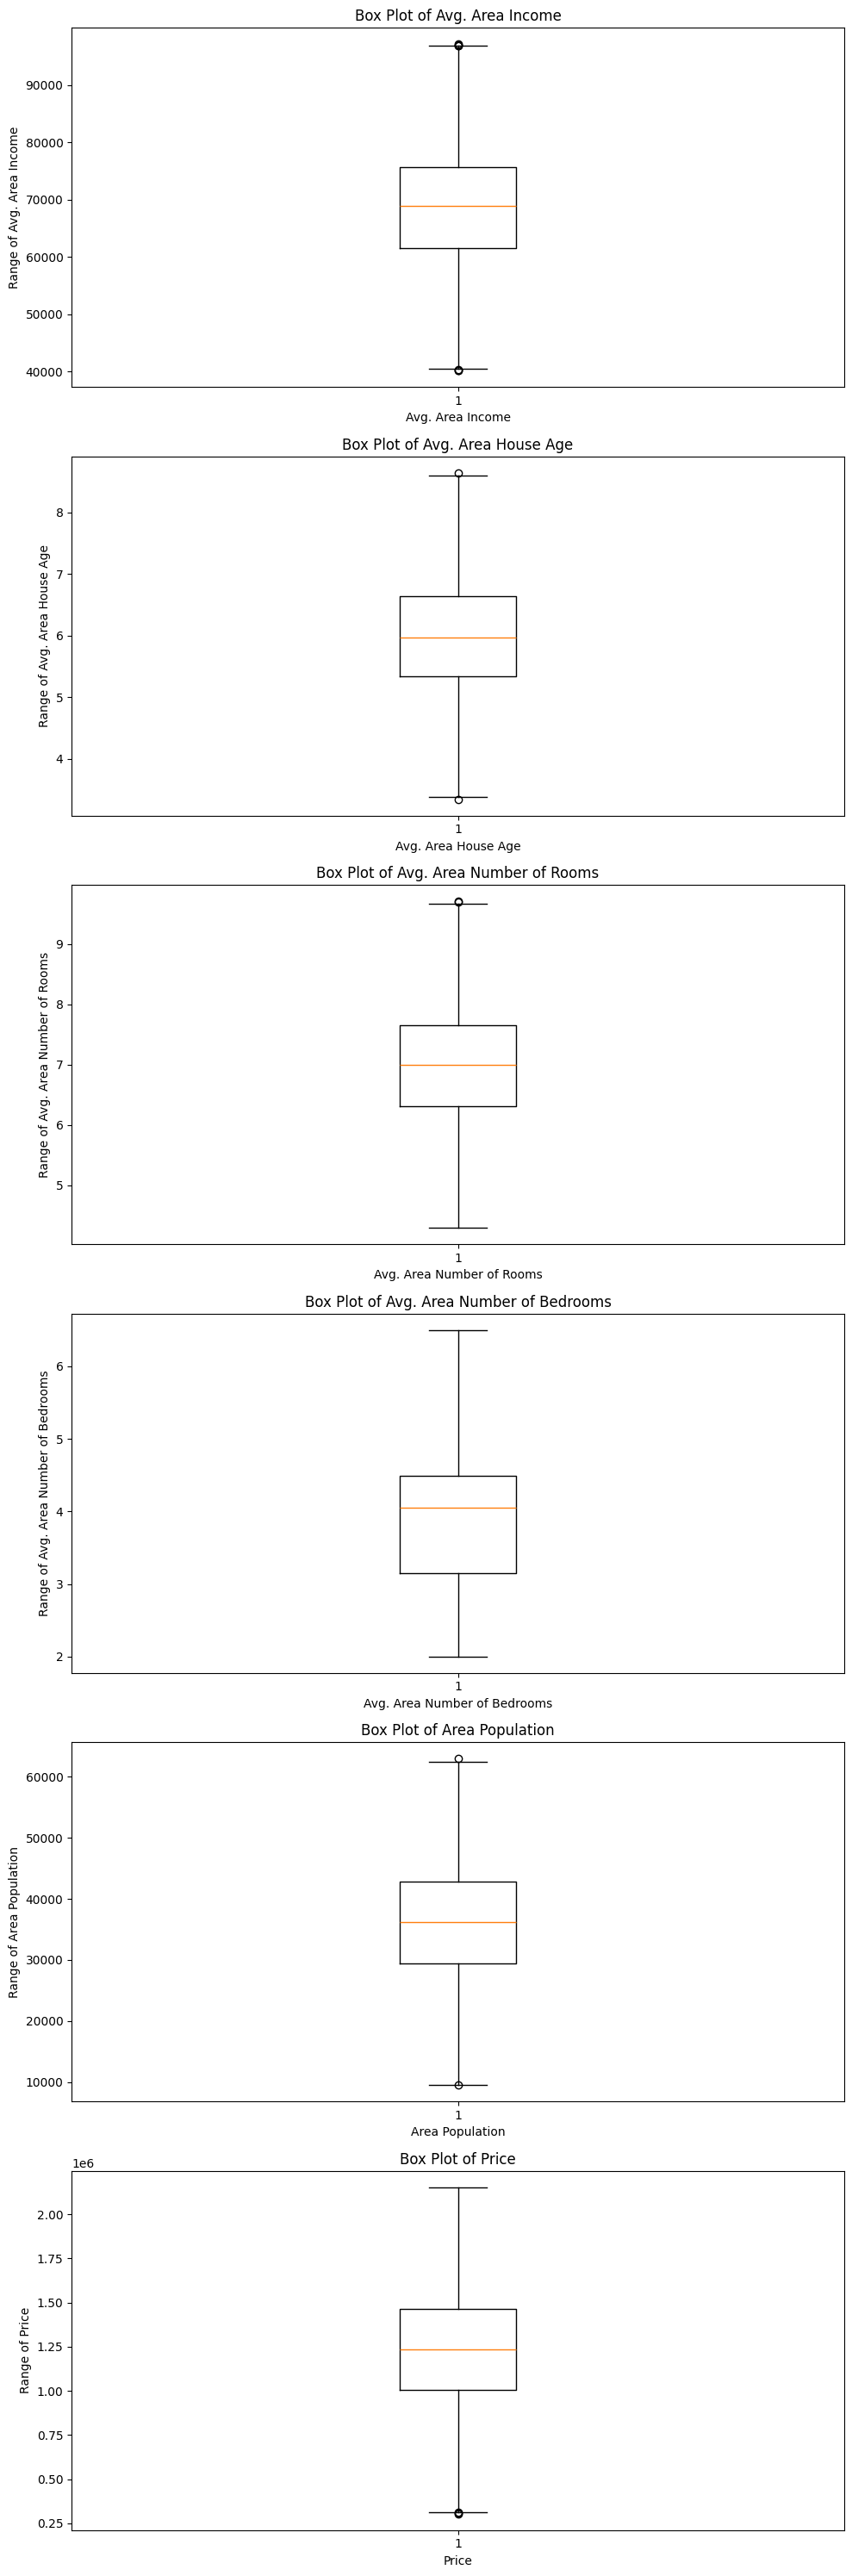

In [7]:
# Convert it into ranges
chartDfHouse = dfHouse
for i in chartDfHouse.columns:
    if chartDfHouse[i].dtype == 'float64':
        q1 = np.percentile(chartDfHouse[i], 25)
        q3 = np.percentile(chartDfHouse[i], 75)
        iqr = q3 - q1
        upperBound = q3 + 1.5 * iqr
        lowerBound = q1 - 1.5 * iqr
        chartDfHouse = chartDfHouse[(chartDfHouse[i] > lowerBound) & (chartDfHouse[i] < upperBound)]
PrintChart(chartDfHouse)

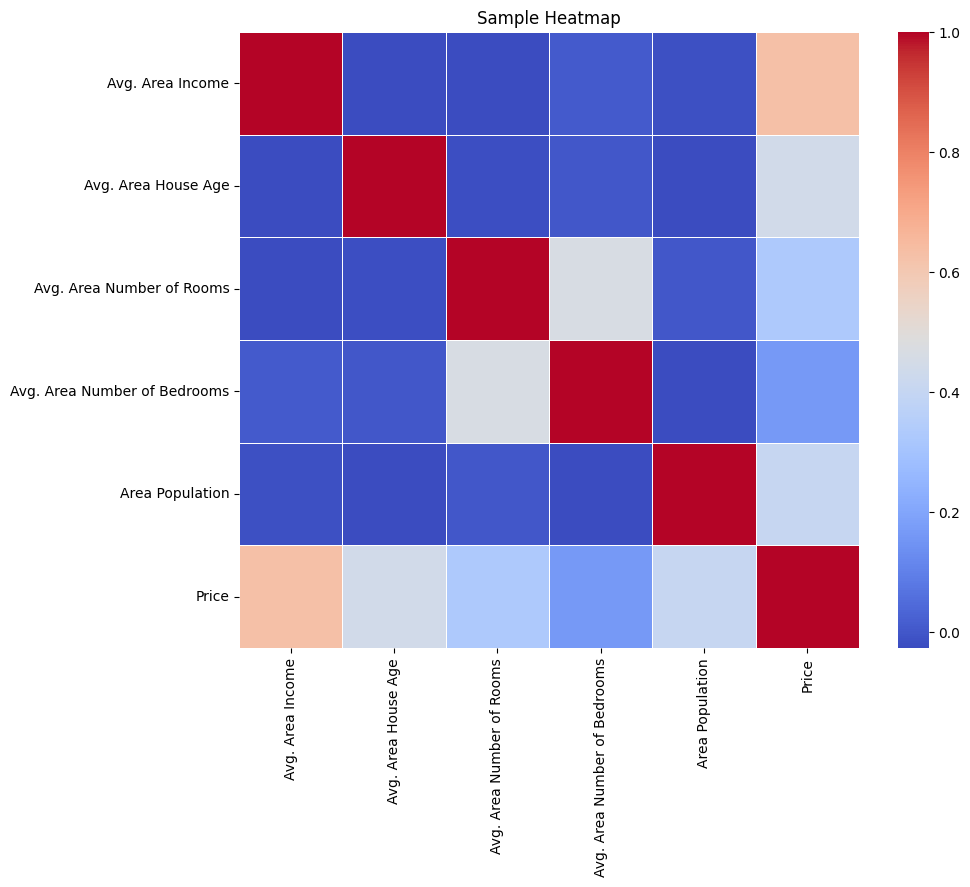

In [15]:
numericChartDfHouse = chartDfHouse.select_dtypes(include='number').corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numericChartDfHouse, cmap='coolwarm', linewidths=.5)
plt.title('Sample Heatmap')
plt.show()
